RMSLE: 0.4834


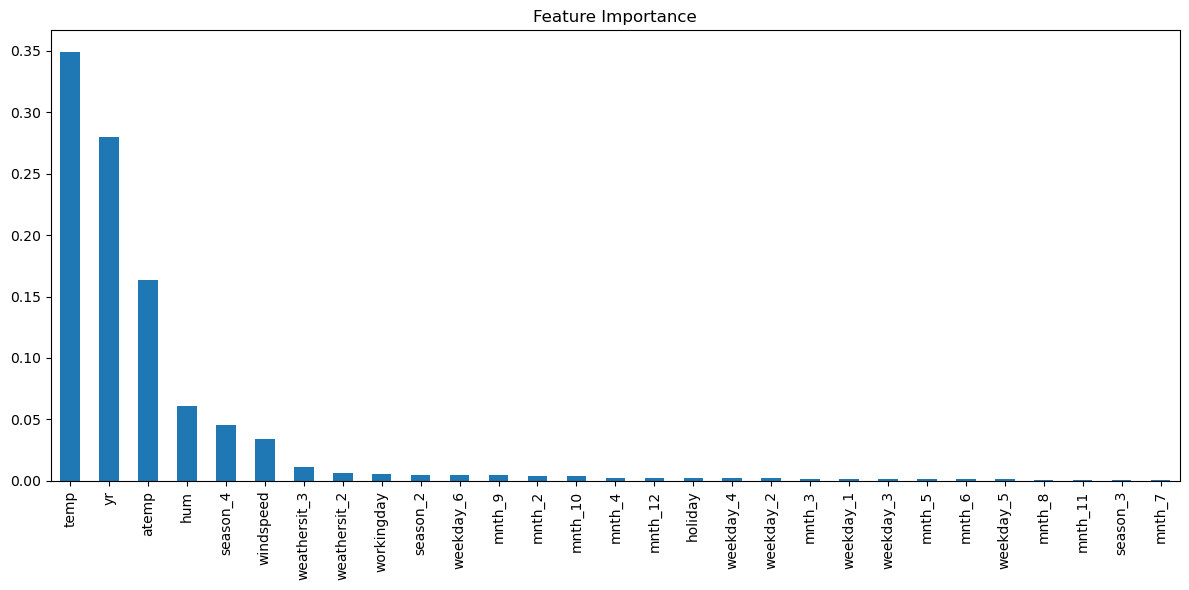

['final_model.pkl']

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Focus on daily prediction
df = day_df.copy()

# Drop unnecessary columns
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)

# Features and target
X = df.drop(['cnt'], axis=1)
y = df['cnt']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

print(f"RMSLE: {rmsle:.4f}")

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# Save the model if needed
import joblib
joblib.dump(model, "final_model.pkl")


In this project, I built a machine learning model to predict daily bike rentals using weather and temporal features. The feature importance chart shows which factors influenced the predictions the most.*

*Temperature (temp) was the most important feature, followed by the year (yr) and the apparent temperature (atemp). This makes sense because bike rentals naturally increase in warmer weather and might vary by year due to trends or growth in users.*

*Other weather-related features like humidity and windspeed also contributed moderately, while categorical variables such as season, month, and weekday had a lower impact.*

*The model achieved an RMSLE of 0.4834, indicating good predictive performance. This analysis helped me understand how different factors affect bike rental behavior and how to interpret model outputs using feature importance.